## Example NoiseGrad and NoiseGrad++

With a few lines of code we show how to use NoiseGrad and NoiseGrad++ with PyTorch, as a way to enhance any explanation method. 

• **Paper:** NoiseGrad: enhancing explanations by introducingstochasticity to model weights \\
• **Authors:** Kirill Bykov\*, Anna Hedström\*, Shinichi Nakajima, Marina M.-C. Höhne \\
• **Institution:** TU Berlin, ML Department, Understandable Machine Intelligence Lab \\
• **Date:** June, 2021 \\

*equal contribution


In [15]:
# Installs.
!pip install captum

# Imports.
import tqdm
import torch
import torchvision
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from captum.attr import *
from torchvision import transforms

import sys
sys.path.append(os.path.realpath('..'))

from src.noisegrad import *
from src.explainers import *
from src.utils import *

# import os
# dirname = os.path.dirname(__file__)
# filename = os.path.join(dirname, 'relative/path/to/file/you/want')

# Notebook settings.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

You should consider upgrading via the '/Users/kirillbykov/anaconda3/bin/python -m pip install --upgrade pip' command.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step 1. Load data and model

In [33]:
# Load original un-normalised image
image = Image.open(os.path.realpath('..') + "/samples/llama.jpg")

# Transform image to a 224x224 image and normalise pixel values
nr_channels = 3
img_size = 224
transformations = transforms.Compose([transforms.Resize(256),
                            transforms.CenterCrop((224, 224)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
normalised_image = transformations(image).reshape(1, nr_channels, img_size, img_size).to(device)

# Set label to a llama imagenet class label
label = 355 

# Load pre-trained ResNet18 model.
model = torchvision.models.resnet18(pretrained=True)
weights = copy.deepcopy(model.state_dict())
model.eval();

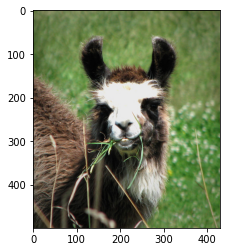

In [35]:
# Show original image
plt.imshow(image)

### Step 2. Initialize methods

In [4]:
# Initialize NoiseGrad: enhance any explanation function!
noisegrad = NoiseGrad(model=model, weights=weights, std=0.25, n=25)

# Initialize NoiseGrad++: enhance any explanation function!
noisegradp = NoiseGradPlusPlus(model=model, weights=weights, std=0.2, sg_std=0.3, n=10, m=10)

NoiseGrad initialized.
NoiseGrad++ initialized.


### Step 3. Get explanations

In [ ]:
# Get baseline explanation.
expl_base = intgrad_explainer(model.to(device), normalised_image, label)

# Get NoiseGrad explanation.
expl_ng = noisegrad.enhance_explanation(inputs=normalised_image, targets=label, explanation_fn=intgrad_explainer, **{"device": device})

# Get NoiseGrad++ explanation.
expl_ngp = noisegradp.enhance_explanation(inputs=normalised_image, targets=label, explanation_fn=intgrad_explainer, **{"device": device})

### Step 4. Visualize explanations

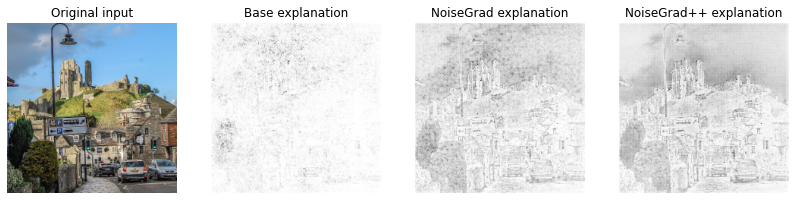

In [7]:
# Plot!
visualize_explanations(image=normalised_image, expl_base=expl_base, expl_ng=expl_ng, expl_ngp=expl_ngp, cmap="gist_gray_r")